In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ndata = pd.read_csv("NextData.csv")

In [3]:
ndata.head()

,Advertiser,Advertiser ID,Advertiser Status,Advertiser Integration Code,Time of Day,Country,Device Type,Advertiser Currency,Impressions,Active View: Measurable Impressions,Active View: Viewable Impressions,Clicks,Revenue (Adv Currency)
0,Next_UK_Zenith,378754,Active,NaN,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673
1,Next_UK_Zenith,378754,Active,NaN,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391
2,Next_UK_Zenith,378754,Active,NaN,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858
3,Next_UK_Zenith,378754,Active,NaN,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433
4,Next_UK_Zenith,378754,Active,NaN,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097


In [4]:
ndata = ndata.drop(ndata.index[336::])

In [5]:
ndata = ndata.drop(["Advertiser ID", "Advertiser Status", "Advertiser Integration Code"], axis=1)

In [6]:
ndata.tail()

,Advertiser,Time of Day,Country,Device Type,Advertiser Currency,Impressions,Active View: Measurable Impressions,Active View: Viewable Impressions,Clicks,Revenue (Adv Currency)
331,Next_UK_Zenith,8.0,AU,Desktop,GBP,54393.0,53375.0,24957.0,41.0,109.464148
332,Next_UK_Zenith,9.0,CZ,Desktop,GBP,11734.0,11593.0,5158.0,25.0,34.568392
333,Next_UK_Zenith,9.0,GB,Smart Phone,GBP,357093.0,333585.0,138886.0,1481.0,985.659847
334,Next_UK_Zenith,9.0,RU,Desktop,GBP,254583.0,251489.0,116124.0,251.0,383.502848
335,Next_UK_Zenith,9.0,SK,Desktop,GBP,82911.0,81246.0,33392.0,81.0,102.547073


In [7]:
ndata.columns

Index(['Advertiser', 'Time of Day', 'Country', 'Device Type',
       'Advertiser Currency', 'Impressions',
       'Active View: Measurable Impressions',
       'Active View: Viewable Impressions', 'Clicks',
       'Revenue (Adv Currency)'],
      dtype='object')

In [8]:
ndata.columns=['Advertiser', 'TOD', 'Country', 'DeviceType',
       'AdvertiserCurrency', 'Impressions',
       'MeasurableImpressions',
       'ViewableImpressions', 'Clicks',
       'Spend']

In [9]:
ndata.head()

,Advertiser,TOD,Country,DeviceType,AdvertiserCurrency,Impressions,MeasurableImpressions,ViewableImpressions,Clicks,Spend
0,Next_UK_Zenith,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673
1,Next_UK_Zenith,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391
2,Next_UK_Zenith,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858
3,Next_UK_Zenith,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433
4,Next_UK_Zenith,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097


In [10]:
ndata["CTR"] = ndata.Clicks / ndata.Impressions
ndata["CPM"] = ndata.Spend / ndata.Impressions * 1000
ndata["Viewability"] = ndata.ViewableImpressions / ndata.MeasurableImpressions

In [11]:
ndata.Country = ndata.Country.astype("category")
ndata.DeviceType = ndata.DeviceType.astype("category")

In [12]:
ndata.head()

,Advertiser,TOD,Country,DeviceType,AdvertiserCurrency,Impressions,MeasurableImpressions,ViewableImpressions,Clicks,Spend,CTR,CPM,Viewability
0,Next_UK_Zenith,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673,0.000187,0.939604,0.266071
1,Next_UK_Zenith,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391,0.000786,2.133181,0.391374
2,Next_UK_Zenith,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858,0.000188,0.802209,0.253057
3,Next_UK_Zenith,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433,0.001669,3.201921,0.623027
4,Next_UK_Zenith,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097,0.000924,2.367791,0.516460


---

In [13]:
#below we explore all functions in jointplot
#this is going to be very similar to lmplot

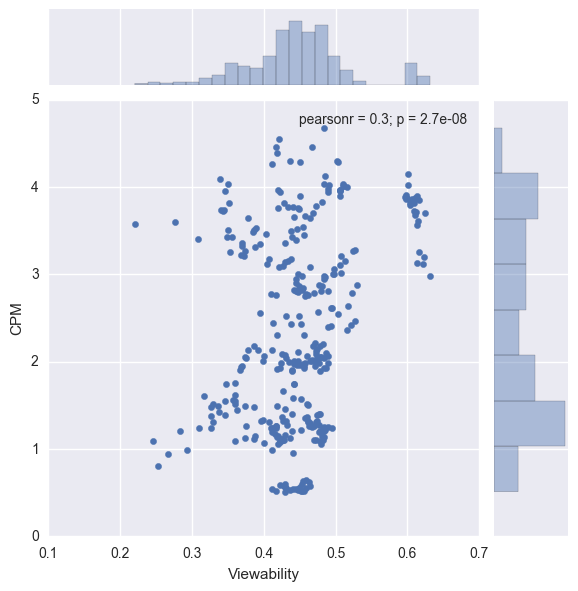

In [14]:
sns.jointplot(data=ndata, x="Viewability", y="CPM")
#as it can be seen that viewability concentrate around 40-50% and CPM concentrate around 1-1.5

/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


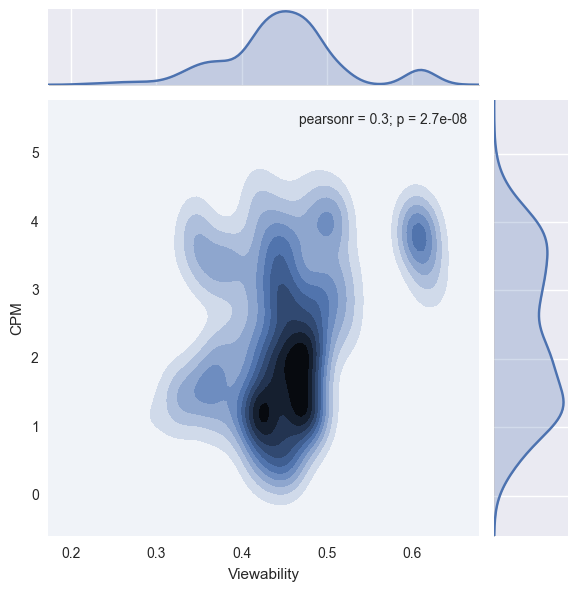

In [15]:
#by default the kind="scatter", there are also
#reg/resid/kde/hex
#hex and kde are great for visualising the cluster/concentration
sns.jointplot(data=ndata, x="Viewability", y="CPM", kind="kde")

---

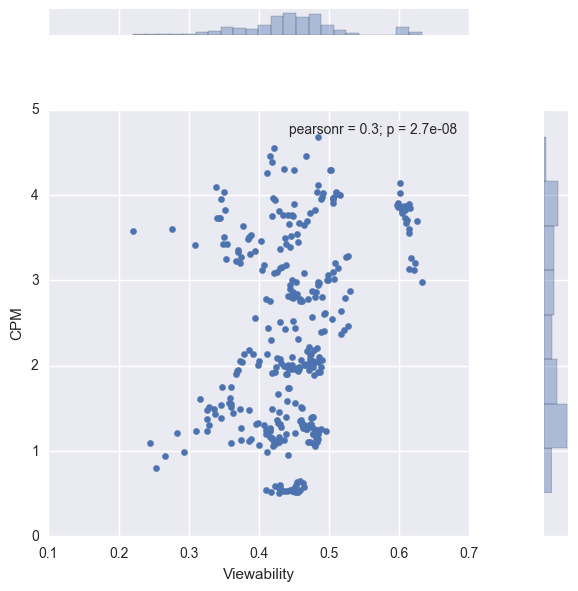

In [16]:
#below parameters allow you to slightly tweak your visualisation
#to increase or decrease the spacing between the main chart and the x/y axis charts 
#we can use space=int, the higher the number the wider the space in between
sns.jointplot(data=ndata, x="Viewability", y="CPM", space=3)

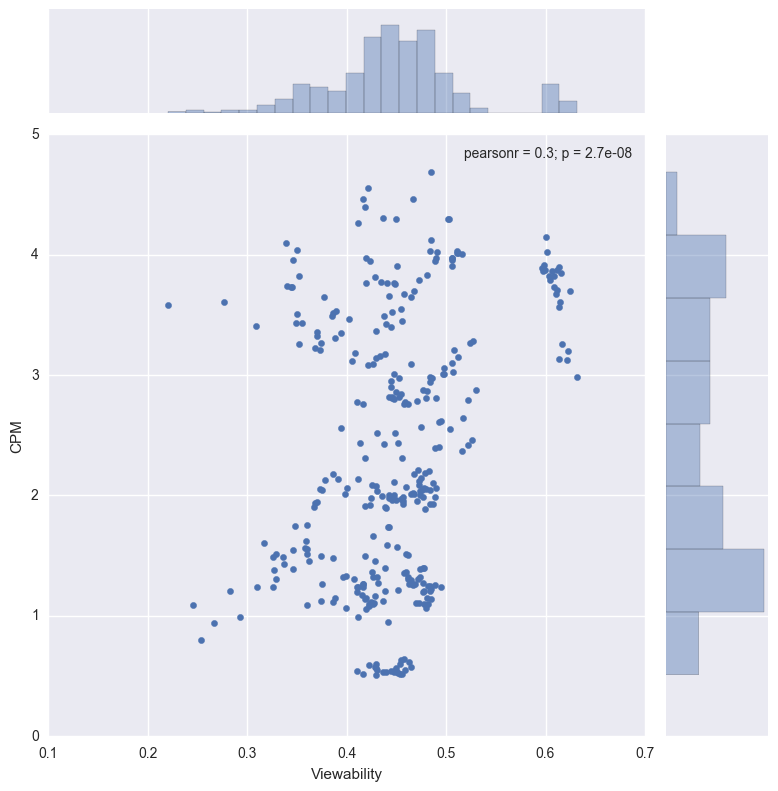

In [17]:
#similar to lmplot, size represent the size of the plot
sns.jointplot(data=ndata, x="Viewability", y="CPM", size=8)

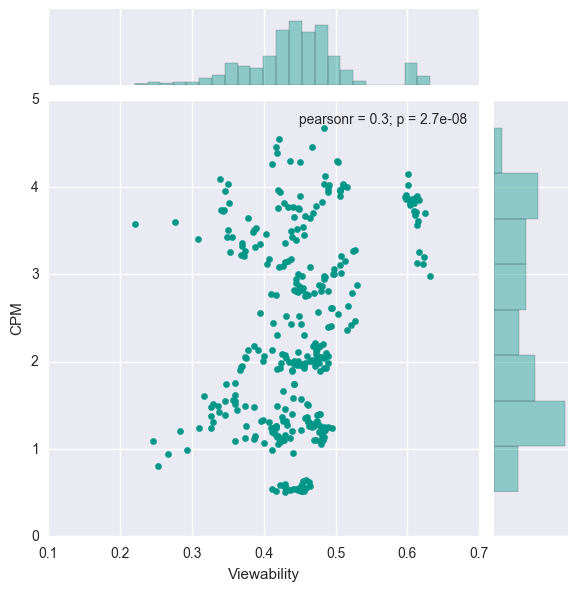

In [18]:
#color scheme setting is different from the likes of lmplot, it's more similar to matplotlib
#it uses c="" to specify
#look up matplotlib color for the library: http://matplotlib.org/api/colors_api.html
sns.jointplot(data=ndata, x="Viewability", y="CPM", color="#009688")

---

In [ ]:
#below we explore displot which is using 1-dimensional data array rather than specifying x and y

/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


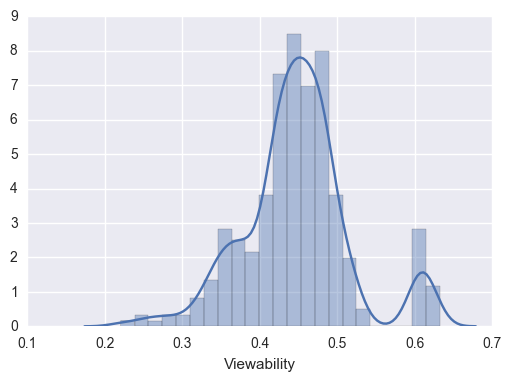

In [20]:
#so here we don't even specifically say data= just the array
sns.distplot(ndata.Viewability)

/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


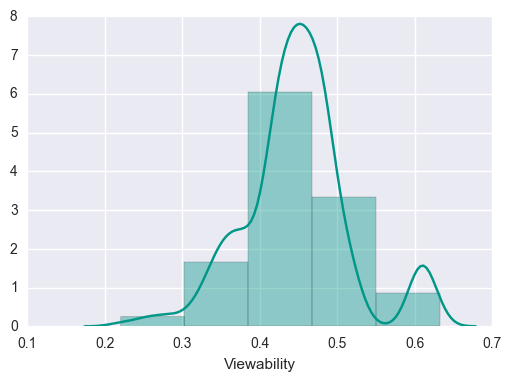

In [24]:
#bins are used to group the displots the way you like
#colors is using matplotlib color library or you can use hex color
sns.distplot(ndata.Viewability, bins=5, color="#009688")

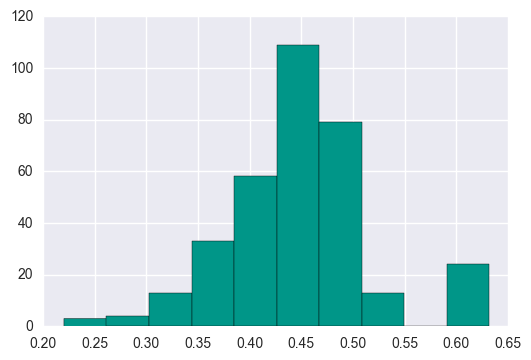

In [28]:
#above is the same as using plt, using the same color= attribute
#plt.show() is used to get rid of the numerical output so just show the plot
plt.hist(ndata.Viewability, color="#009688")
plt.show()

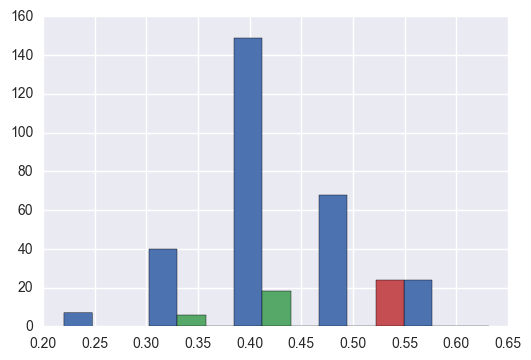

In [62]:
#now assuming we like above to be separated by device we pass those arrays as a array using []
plt.hist([ndata.Viewability[ndata.DeviceType == "Desktop"], 
          ndata.Viewability[ndata.DeviceType == "Smart Phone"], 
          ndata.Viewability[ndata.DeviceType == "Tablet"]], bins=5, rwidth=20)
plt.show()

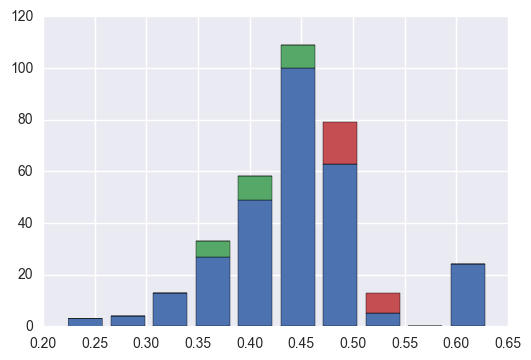

In [52]:
#stacked attribute allow them to be stacked, this is plt attribute
plt.hist([ndata.Viewability[ndata.DeviceType == "Desktop"], 
          ndata.Viewability[ndata.DeviceType == "Smart Phone"], 
          ndata.Viewability[ndata.DeviceType == "Tablet"]], bins=10, stacked=True)
plt.show()

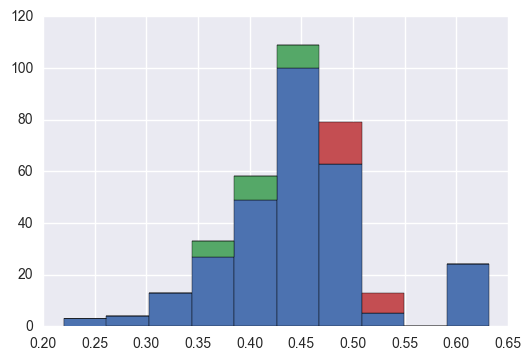

In [108]:
#here is a coding challenge for above monkey tasks
#it firstly creates an empty list which will receive all the unique DeviceTpe as a list 
#the plt plots all the viewability data by devices
#rwidth is used to set the space inbetween bars, when equals to 1 it means no space
DeviceList = []
def chart(x):
    for x in ndata.DeviceType.cat.categories:
        DeviceList.append(ndata.Viewability[ndata.DeviceType == x])
    plt.hist(DeviceList, stacked=True, rwidth=1)
    plt.show()
chart(ndata.DeviceType.cat.categories)

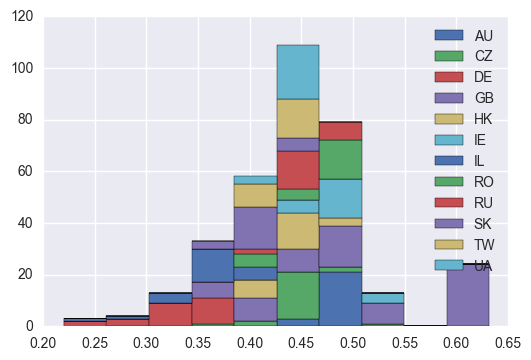

In [122]:
#another example but there is no need for creating function, just using loops
#label is another attribute in plt
ndata.Country.astype("category")
CountryList = []
myLabels =[]
for x in ndata.Country.cat.categories:
    CountryList.append(ndata.Viewability[ndata.Country == x])
    myLabels.append(x)
plt.hist(CountryList, stacked=True, rwidth=1, label=myLabels)
plt.legend()
plt.show()